<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%207/Assignment_7_Trail_1_Buidling_CNN_without_Dilation_or_Depthwise_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('sample_data')
!pip install asgnmt7-0.0.0-py3-none-any.whl

## Load the Packages

In [0]:
import torch

from asgnmt7.TrainTestLoader import *
from asgnmt7.BaseModel import Net
from asgnmt7.ModelPerformance import *


## Loading and Viewing Data

Files already downloaded and verified
Files already downloaded and verified
  car  ship   car plane


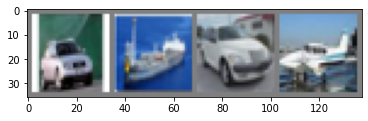

In [3]:
train_loader,test_loader,classes = TrainTestLoad()

ViewTrainingImages(train_loader)

## Loading and Viewing Model

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = Net().to(device)
net

Net(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, a

In [5]:
from torchsummary import summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]          73,728
             ReLU-11          [-1, 128, 16, 16]               0
      BatchNorm2d-12          [-1, 128, 16, 16]             256
          Dropout-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

## Buiiding Model

In [6]:
from asgnmt7.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(8):
    print("EPOCH:", epoch)
    tt.train_(net, device, train_loader, optimizer, epoch,L1 = False)
    acc = tt.test_(net, device, test_loader) 
    
print('Finished Training')

  0%|          | 0/12500 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.4529223442077637 Batch_id=12499 Accuracy=49.73: 100%|██████████| 12500/12500 [01:54<00:00, 108.87it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.9645, Accuracy: 6654/10000 (66.54%)

EPOCH: 1


Loss=1.445088267326355 Batch_id=12499 Accuracy=68.40: 100%|██████████| 12500/12500 [01:54<00:00, 108.88it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.7444, Accuracy: 7410/10000 (74.10%)

EPOCH: 2


Loss=0.7040178179740906 Batch_id=12499 Accuracy=74.63: 100%|██████████| 12500/12500 [01:55<00:00, 108.34it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.7455, Accuracy: 7575/10000 (75.75%)

EPOCH: 3


Loss=0.5452340245246887 Batch_id=12499 Accuracy=78.28: 100%|██████████| 12500/12500 [01:54<00:00, 108.77it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.6651, Accuracy: 7810/10000 (78.10%)

EPOCH: 4


Loss=0.033798813819885254 Batch_id=12499 Accuracy=80.73: 100%|██████████| 12500/12500 [01:54<00:00, 108.79it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.6219, Accuracy: 8016/10000 (80.16%)

EPOCH: 5


Loss=0.4099874198436737 Batch_id=12499 Accuracy=82.75: 100%|██████████| 12500/12500 [01:54<00:00, 109.23it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.5990, Accuracy: 8077/10000 (80.77%)

EPOCH: 6


Loss=0.03590798377990723 Batch_id=12499 Accuracy=84.55: 100%|██████████| 12500/12500 [01:55<00:00, 108.50it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.5872, Accuracy: 8117/10000 (81.17%)

EPOCH: 7


Loss=0.3708112835884094 Batch_id=12499 Accuracy=85.74: 100%|██████████| 12500/12500 [01:54<00:00, 109.23it/s]



Test set: Average loss: 0.5802, Accuracy: 8178/10000 (81.78%)

Finished Training


## Model Graphs

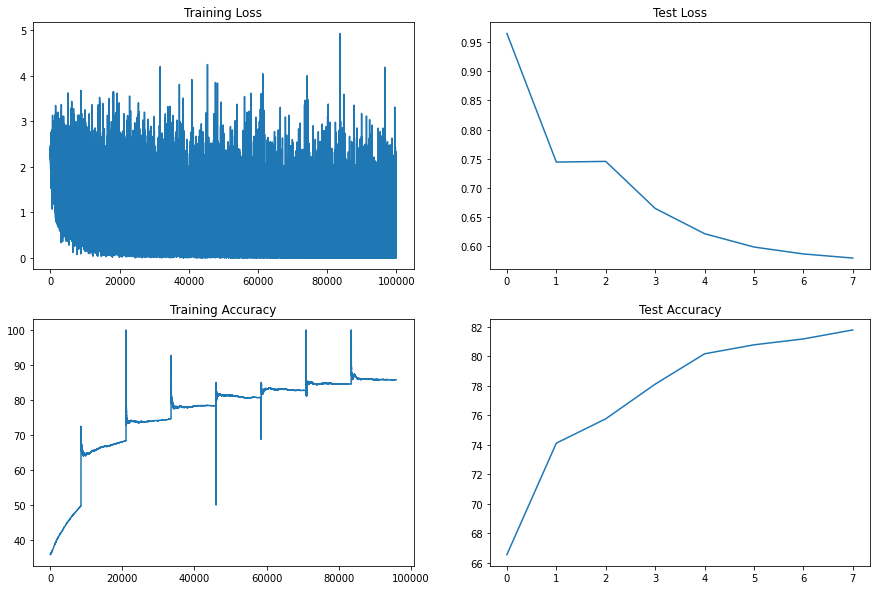

In [7]:
PlotTrainingGraphs(tt)

## View Model Performance

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 81 %
Accuracy of plane : 87 %
Accuracy of   car : 93 %
Accuracy of  bird : 80 %
Accuracy of   cat : 70 %
Accuracy of  deer : 77 %
Accuracy of   dog : 70 %
Accuracy of  frog : 87 %
Accuracy of horse : 79 %
Accuracy of  ship : 89 %
Accuracy of truck : 80 %


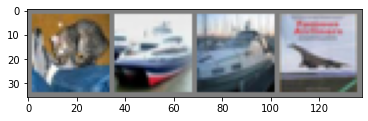

In [8]:
ViewModelPerformance(test_loader,net,classes,device)